In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = cycler(marker=['o', '*', 'X', 'P', '>', 'D'])
plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
df = []
for od in range(0, 5+1):
    df.append(pd.read_csv(f'./sim{od}.ratio.csv', sep=',', converters={'c_packet_rate': p2f}))


In [4]:
df[0]['mode'] = 'FB_5to11_浮點數倍後退'
df[1]['mode'] = 'FB_5to11_1/2_浮點數倍後退'
df[2]['mode'] = 'FB_5to11_1/3_浮點數倍後退'
df[3]['mode'] = 'FB_5to11_1/5_浮點數倍後退'
df[4]['mode'] = 'FB_5to11_1/10_浮點數倍後退'
df[5]['mode'] = 'FB_5to11_1/100_浮點數倍後退'


In [5]:
df = pd.concat([d for d in df], axis=0, sort=False)

In [6]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [7]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']
df['avg_agg_packets'] = df['agg_packets'] / df['period']
df['avg_append_packets'] = df['append_packets'] / df['period']
df['agg_packets_percent'] = df['agg_packets'] / df['c_sensor_want_send_packets']
df['append_packets_percent'] = df['append_packets'] / df['c_sensor_want_send_packets']

In [8]:
select = df.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [9]:
select

mode  nodes  period  c_packet_rate  \
0    FB_5to11_1/100_浮點數倍後退    100      50       0.793840   
1    FB_5to11_1/100_浮點數倍後退    100     100       0.807730   
2    FB_5to11_1/100_浮點數倍後退    100     150       0.893050   
3    FB_5to11_1/100_浮點數倍後退    100     200       0.920270   
4    FB_5to11_1/100_浮點數倍後退    100     250       0.929630   
..                     ...    ...     ...            ...   
565        FB_5to11_浮點數倍後退    500     750       0.924093   
566        FB_5to11_浮點數倍後退    500     800       0.934620   
567        FB_5to11_浮點數倍後退    500     850       0.930573   
568        FB_5to11_浮點數倍後退    500     900       0.930477   
569        FB_5to11_浮點數倍後退    500     950       0.940913   

     c_sensor_want_send_packets  c_sensor_buffer_packets  \
0                   7291.000000              2420.000000   
1                   3559.000000               659.000000   
2                   2437.000000                61.000000   
3                   1774.000000                18.000000   
4                   1433.000000                11.000000   
..                          ...                      ...   
565                 2384.333333               649.333333   
566                 2267.666667               562.666667   
567                 2149.000000               488.000000   
568                 1973.000000               386.666667   
569                 1907.666667               345.666667   

     c_sensor_send_success  c_sensor_drop_packets  agg_packets  \
0              3052.000000                 1819.0          0.0   
1              2898.000000                    2.0          0.0   
2              2376.000000                    0.0          0.0   
3              1756.000000                    0.0          0.0   
4              1422.000000                    0.0          0.0   
..                     ...                    ...          ...   
565            1735.000000                    0.0          0.0   
566            1705.000000                    0.0          0.0   
567            1661.000000                    0.0          0.0   
568            1586.333333                    0.0          0.0   
569            1562.000000                    0.0          0.0   

     append_packets  out_of_date_packets  c_sensor_buffer_packet_rate  \
0               0.0                  0.0                    24.200000   
1               0.0                  0.0                     6.590000   
2               0.0                  0.0                     0.610000   
3               0.0                  0.0                     0.180000   
4               0.0                  0.0                     0.110000   
..              ...                  ...                          ...   
565             0.0                  0.0                     1.298667   
566             0.0                  0.0                     1.125333   
567             0.0                  0.0                     0.976000   
568             0.0                  0.0                     0.773333   
569             0.0                  0.0                     0.691333   

     c_sensor_drop_packet_rate  c_sensor_success_packet_rate  \
0                        18.19                     24.227997   
1                         0.02                     23.408015   
2                         0.00                     21.218868   
3                         0.00                     16.159941   
4                         0.00                     13.219339   
..                         ...                           ...   
565                       0.00                      3.206613   
566                       0.00                      3.186628   
567                       0.00                      3.091328   
568                       0.00                      2.952005   
569                       0.00                      2.939332   

     c_sensor_success_padding_packet_rate  avg_agg_packets  \
0                                0.332300              0.0   
1                

In [10]:

sector2 = select.groupby('nodes')

In [11]:
sector2.size()

nodes
100    114
200    114
300    114
400    114
500    114
dtype: int64

## 封包到達率

In [12]:

b = df.groupby('mode', as_index=False).mean()
b.loc[b['mode']=='FB_5to11_1/100_浮點數倍後退', 'int_index'] = 0
b.loc[b['mode']=='FB_5to11_1/10_浮點數倍後退', 'int_index'] = 1
b.loc[b['mode']=='FB_5to11_1/5_浮點數倍後退', 'int_index'] = 2
b.loc[b['mode']=='FB_5to11_1/3_浮點數倍後退', 'int_index'] = 3
b.loc[b['mode']=='FB_5to11_1/2_浮點數倍後退', 'int_index'] = 4
b.loc[b['mode']=='FB_5to11_浮點數倍後退', 'int_index'] = 5
b
# b['int_index'] = range(len(b))
b.sort_values('int_index', ascending = False, inplace= True)

In [13]:
b

mode  nodes  period  c_packet_rate  \
5        FB_5to11_浮點數倍後退  300.0   500.0       0.940600   
2    FB_5to11_1/2_浮點數倍後退  300.0   500.0       0.931157   
3    FB_5to11_1/3_浮點數倍後退  300.0   500.0       0.925135   
4    FB_5to11_1/5_浮點數倍後退  300.0   500.0       0.916709   
1   FB_5to11_1/10_浮點數倍後退  300.0   500.0       0.902411   
0  FB_5to11_1/100_浮點數倍後退  300.0   500.0       0.852040   

   c_sensor_want_send_packets  c_sensor_buffer_packets  c_sensor_send_success  \
5                 4034.063158              1809.747368            1473.880702   
2                 4027.631579              1698.610526            1606.284211   
3                 4033.905263              1626.231579            1694.894737   
4                 4032.957895              1545.368421            1794.652632   
1                 4036.368421              1442.210526            1928.357895   
0                 4024.578947              1177.442105            2259.421053   

   c_sensor_drop_packets  agg_packets  append_packets  out_of_date_packets  \
5             750.435088          0.0             0.0                  0.0   
2             722.736842          0.0             0.0                  0.0   
3             712.778947          0.0             0.0                  0.0   
4             692.936842          0.0             0.0                  0.0   
1             665.800000          0.0             0.0                  0.0   
0             587.715789          0.0             0.0                  0.0   

   c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
5                     5.473446                   2.369063   
2                     5.093144                   2.264491   
3                     4.847521                   2.200856   
4                     4.578030                   2.143098   
1                     4.234542                   2.040521   
0                     3.412774                   1.756474   

   c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
5                      5.277839                              0.630458   
2                      5.648978                              0.666808   
3                      5.907321                              0.686402   
4                      6.135225                              0.706873   
1                      6.442032                              0.728792   
0                      6.798415                              0.755397   

   avg_agg_packets  avg_append_packets  agg_packets_percent  \
5              0.0                 0.0                  0.0   
2              0.0                 0.0                  0.0   
3              0.0                 0.0                  0.0   
4              0.0                 0.0                  0.0   
1              0.0                 0.0                  0.0   
0              0.0                 0.0                  0.0   

   append_packets_percent  int_index  
5                     0.0        5.0  
2                     0.0        4.0  
3                     0.0        3.0  
4                     0.0        2.0  
1                     0.0        1.0  
0                     0.0        0.0

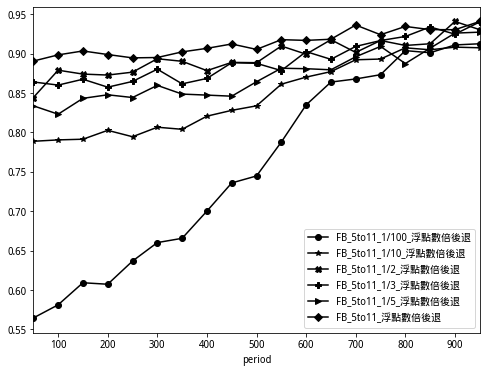

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

Text(0, 0.5, '封包到達率')

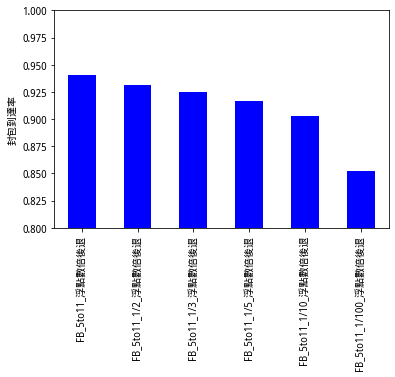

In [15]:

b.plot.bar(x='mode', y='c_packet_rate', ylim=(0.8, 1), legend=False, sort_columns=True)

plt.xlabel('')
plt.ylabel('封包到達率')

Text(0, 0.5, '封包平均發送量')

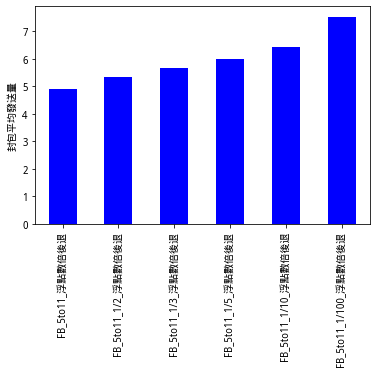

In [16]:
b['c_sensor_send_success_per_node'] = b['c_sensor_send_success'] / b['nodes']
b.plot.bar(x='mode', y='c_sensor_send_success_per_node', legend=False, sort_columns=True)

plt.xlabel('')
plt.ylabel('封包平均發送量')

In [17]:
b.to_csv('後退的參數量到達率&封包平均發送量.csv')